Matploblib-Challenge: Pymaceuticals_starter Student: Jorge Alberto Muñozcano Castro

## Dependencies and starter code

In [75]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)
#mouse_metadata.head() 
#study_results.head()
# Combine the data into a single dataset
mouse_study_analysis=pd.merge(mouse_metadata, study_results, on = "Mouse ID")
mouse_study_analysis.head() #merge succesfull data frame printed

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [76]:
#Lets sort the Data frame on Tumor Volume column from the top to bottom
Tumor_Analysis = mouse_study_analysis.sort_values(["Tumor Volume (mm3)"], ascending=True)
Tumor_Analysis.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
7,k403,Ramicane,Male,21,16,35,26.546993,1


## Summary statistics

In [77]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#Used Groupby on previouse data frame and used the agg feature to get all the statisctis anayzis asked
Study_Analysis= Tumor_Analysis.groupby("Drug Regimen")
Summary_Analysis =Study_Analysis.agg(["sum","mean","median","var","std","sem"])["Tumor Volume (mm3)"]
Summary_Analysis #test succesfully the dataframe was printed

,sum,mean,median,var,std,sem
Drug Regimen,,,,,,
Capomulin,9355.420462,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,9361.228582,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,9413.493529,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,10384.299876,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,10105.671026,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,9780.078122,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,8423.930878,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,9169.417875,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,9816.199991,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

In [78]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
#generate a dataframe with the ticks the x arrays(drug regime)
data_points = mouse_study_analysis.groupby("Drug Regimen").count()["Tumor Volume (mm3)"]
barchart_analysis = pd.DataFrame(data_points)
barchart_analysis.head(10) #test successfull Data Frame generated

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,161
Ramicane,228
Stelasyn,181


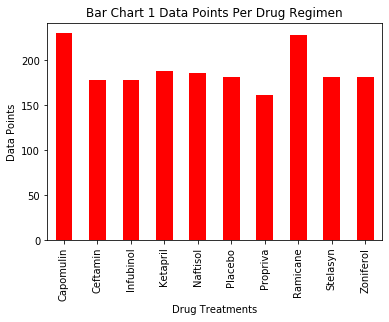

In [79]:
#Generate Chart with labels and give them some format
pandas_barchart = barchart_analysis.plot.bar(legend=False, color="red",rot=90)
plt.title("Bar Chart 1 Data Points Per Drug Regimen")
plt.xlabel("Drug Treatments")
plt.ylabel("Data Points")
pandas_barchart #test succesfull chart generated

In [80]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
#Stablish the x axs with len on the data points, afterwards create a loop with the tick locations of the drug regime
x_axis = np.arange(len(data_points))
x_axis
for x in x_axis:
    tick_locations.append(x)
#reset the barchart index in order to avoid errors
barchart = barchart_analysis.reset_index()
barchart.head() #test succesfully data frame reseted and generated

,Drug Regimen,Tumor Volume (mm3)
0,Capomulin,230
1,Ceftamin,178
2,Infubinol,178
3,Ketapril,188
4,Naftisol,186


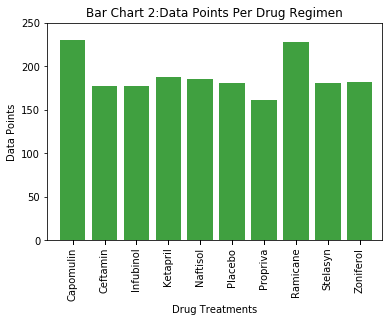

In [81]:
#format the bar chart with differentaligment color and their respective labels
plt.bar(x_axis, barchart_analysis["Tumor Volume (mm3)"], color="g", alpha=0.75, align="center")
plt.xticks(tick_locations, barchart["Drug Regimen"],rotation="vertical")
plt.xlim(-0.80, len(data_points)-.30)
plt.ylim(0, 250)
plt.title("Bar Chart 2:Data Points Per Drug Regimen")
plt.xlabel("Drug Treatments")
plt.ylabel("Data Points")
plt.show() #test succesful chart stablish

In [82]:
#sort the data frame for futher analysis
BarChanaylsis =barchart_analysis.sort_values(["Tumor Volume (mm3)"], ascending=False)
BarChanaylsis.head(10)#test succesfully data frame generated

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Placebo,181
Stelasyn,181
Ceftamin,178
Infubinol,178


## Pie plots

In [83]:
#Generate a pie plot showing the distribution of female versus male mice using pandas
#Use the groupby function to separate to create a new data frame using Mouse ID and Sex using the count function
gendermice = mouse_study_analysis.groupby(["Mouse ID","Sex"])
gendermice
Data_gender = pd.DataFrame(gendermice.size())
gender_analysis = pd.DataFrame(Data_gender.groupby(["Sex"]).count())
gender_analysis.columns = ["Total Count"]
#Create and format the percentage of female vs male
gender_analysis["Percentage of Sex"] = (100*(gender_analysis["Total Count"]/gender_analysis["Total Count"].sum()))
#format the "Percentage of Sex" column
gender_analysis["Percentage of Sex"] = gender_analysis["Percentage of Sex"]
gender_analysis.head()

,Total Count,Percentage of Sex
Sex,,
Female,124,49.799197
Male,125,50.200803


In [84]:
#format the data frame on the 3 column with the % symbol
genderanalysis = gender_analysis.style.format({'Percentage of Sex': '{:.2f}%'})
genderanalysis# Test sucesfull data frame printed

,Total Count,Percentage of Sex
Sex,,
Female,124,49.80%
Male,125,50.20%


Text(0.5, 1.0, 'Pie Chart 1:Data Porcentage per Gender')

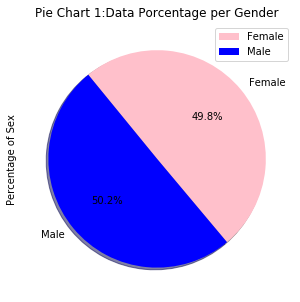

In [85]:
#Create pie chart with the previuse data frame
colors = ['pink', 'blue']
plot = gender_analysis.plot.pie(y='Percentage of Sex',figsize=(5,5), colors = colors, startangle=310, shadow = True, autopct="%1.1f%%")
plt.title("Pie Chart 1:Data Porcentage per Gender")

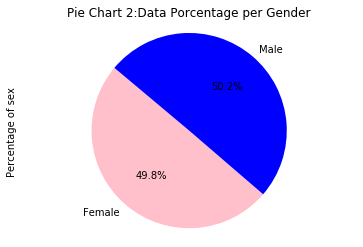

In [86]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Create Labels for the sections of the pie
gender = ["Female","Male"]
#List the values of each section of the pie chart
datapergender = [49.80,50.20]
#Set colors for each section of the pie
classification = ['pink', 'blue']
#Create the pie chart based previouse gender data frame
plt.pie(datapergender, labels=gender, colors=classification, autopct="%1.1f%%", startangle=140)
plt.title("Pie Chart 2:Data Porcentage per Gender")
plt.ylabel("Percentage of sex")
plt.axis("equal")
plt.show() #test succesfuly pie chart fuly generated

## Quartiles, outliers and boxplots

In [87]:
#Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
#Extract the capomulin information data from the main data frame
capomulin = mouse_study_analysis.loc[mouse_study_analysis["Drug Regimen"] == "Capomulin", :]
capomulin.head() #test succesfully data frame generated

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [88]:
#Organized the capomulin data and generate a new data frame using the groupby  function on Mouse ID and Timepoint 
capmax = capomulin.groupby('Mouse ID').max()['Timepoint'] 
capmax_vol = pd.DataFrame(capmax)
capomulin_data = pd.merge(capmax_vol, mouse_study_analysis, on=("Mouse ID","Timepoint"))
capomulin_data.head() #test succesfully data frame generated

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [89]:
#Calculate the IQR and quantitatively determine if there are any potential outliers. 
capo_diseases = capomulin_data["Tumor Volume (mm3)"]
quartiles = capo_diseases.quantile([.25,.5,.75])
print(f"Capomulin Treatment, Quartiles, IQR, Outliers:")
quartiles = capo_diseases.quantile([.25,.5,.75])
low_quart = quartiles[0.25]
print(f"The lower quartile: {low_quart}")
up_quart = quartiles[0.75]
print(f"The upper quartile: {up_quart}")
iqr = up_quart-low_quart
print(f"The IQR: {iqr}")
low_bound = low_quart - (1.5*iqr)
print(f"The lower outilier: {low_bound}")
up_bound = up_quart + (1.5*iqr)
print(f"The upper outier: {up_bound}")

Capomulin Treatment, Quartiles, IQR, Outliers:
The lower quartile: 32.37735684
The upper quartile: 40.1592203
The IQR: 7.781863460000004
The lower outilier: 20.70456164999999
The upper outier: 51.83201549


In [90]:
#Extract the ramicane information data from the main data frame
ramicane = mouse_study_analysis.loc[mouse_study_analysis["Drug Regimen"] == "Ramicane", :]
ramicane.head() #test succesfully data frame generated

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [91]:
#Extract the ramicane data and generate a new data frame using the groupby  function on Mouse ID and Timepoint 
rammax = ramicane.groupby('Mouse ID').max()['Timepoint']
rammax_vol = pd.DataFrame(rammax)
ramicane_data = pd.merge(rammax_vol, mouse_study_analysis, on=("Mouse ID","Timepoint"),how="left")
ramicane_data.head(5) #test succesfully data frame generated

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [92]:
#Calculate the IQR and quantitatively determine if there are any potential outliers. 
ram_diseases = ramicane_data["Tumor Volume (mm3)"]

print(f"Ramicane Treatment, Quartiles, IQR, Outliers:")
quartiles = ram_diseases.quantile([.25,.5,.75])

low_quart = quartiles[0.25]
print(f"The lower quartile: {low_quart}")
up_quart = quartiles[0.75]
print(f"The upper quartile: {up_quart}")
iqr = up_quart-low_quart
print(f"The IQR: {iqr}")
low_bound = low_quart - (1.5*iqr)
print(f"The lower outilier: {low_bound}")
up_bound = up_quart + (1.5*iqr)
print(f"The upper outier: {up_bound}")

Ramicane Treatment, Quartiles, IQR, Outliers:
The lower quartile: 31.56046955
The upper quartile: 40.65900627
The IQR: 9.098536719999998
The lower outilier: 17.912664470000003
The upper outier: 54.30681135


In [93]:
#Extract the infubinol information data from the main data frame
infubinol = mouse_study_analysis.loc[mouse_study_analysis["Drug Regimen"] == "Infubinol", :]
infubinol.head()#test succesfully data frame generated

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
454,a203,Infubinol,Female,20,23,0,45.000000,0
455,a203,Infubinol,Female,20,23,5,48.508468,0
456,a203,Infubinol,Female,20,23,10,51.852437,1
457,a203,Infubinol,Female,20,23,15,52.777870,1
458,a203,Infubinol,Female,20,23,20,55.173336,1


In [94]:
#Extract the infubinol data and generate a new data frame using the groupby  function on Mouse ID and Timepoint
infumax = infubinol.groupby('Mouse ID').max()['Timepoint']
infumax_vol = pd.DataFrame(infumax)
infubinol_data = pd.merge(infumax_vol, mouse_study_analysis, on=("Mouse ID","Timepoint"))
infubinol_data.head() #test succesfully data frame generated

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [95]:
#Calculate the IQR and quantitatively determine if there are any potential outliers.
infu_diseases = infubinol_data["Tumor Volume (mm3)"]

print(f"Infubinol Treatment, Quartiles, IQR, Outliers:")
quartiles = infu_diseases.quantile([.25,.5,.75])

low_quart = quartiles[0.25]
print(f"The lower quartile: {low_quart}")
up_quart = quartiles[0.75]
print(f"The upper quartile: {up_quart}")
iqr = up_quart-low_quart
print(f"The IQR: {iqr}")
low_bound = low_quart - (1.5*iqr)
print(f"The lower outilier: {low_bound}")
up_bound = up_quart + (1.5*iqr)
print(f"The upper outlier: {up_bound}")

Infubinol Treatment, Quartiles, IQR, Outliers:
The lower quartile: 54.04860769
The upper quartile: 65.52574285
The IQR: 11.477135160000003
The lower outilier: 36.83290494999999
The upper outlier: 82.74144559000001


In [96]:
#Extract the cetfamin data and generate a new data frame using the groupby  function on Mouse ID and Timepoint
ceftamin = mouse_study_analysis.loc[mouse_study_analysis["Drug Regimen"] == "Ceftamin", :]
ceftamin.head() #test succesfully data frame generated

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
484,a275,Ceftamin,Female,20,28,0,45.000000,0
485,a275,Ceftamin,Female,20,28,5,46.795257,0
486,a275,Ceftamin,Female,20,28,10,47.371343,0
487,a275,Ceftamin,Female,20,28,15,49.734404,0
488,a275,Ceftamin,Female,20,28,20,50.513437,1


In [97]:
#Extract the ceftamin data and generate a new data frame using the groupby  function on Mouse ID and Timepoint
cefmax = ceftamin.groupby('Mouse ID').max()['Timepoint']
cefmax_vol = pd.DataFrame(cefmax)
ceftamin_data = pd.merge(cefmax_vol, mouse_study_analysis, on=("Mouse ID","Timepoint"))
ceftamin_data.head(5)#test succesfully data frame generated

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [98]:
#Calculate the IQR and quantitatively determine if there are any potential outliers.
cef_diseases = ceftamin_data["Tumor Volume (mm3)"]

print(f"Ceftamin Treatment, Quartiles, IQR, Outliers:")
quartiles = cef_diseases.quantile([.25,.5,.75])

low_quart = quartiles[0.25]
print(f"The lower quartile: {low_quart}")
up_quart = quartiles[0.75]
print(f"The upper quartile: {up_quart}")
iqr = up_quart-low_quart
print(f"The IQR: {iqr}")
low_bound = low_quart - (1.5*iqr)
print(f"The lower outilier: {low_bound}")
up_bound = up_quart + (1.5*iqr)
print(f"The upper outier: {up_bound}")

Ceftamin Treatment, Quartiles, IQR, Outliers:
The lower quartile: 48.72207785
The upper quartile: 64.29983003
The IQR: 15.577752179999997
The lower outilier: 25.355449580000002
The upper outier: 87.66645829999999


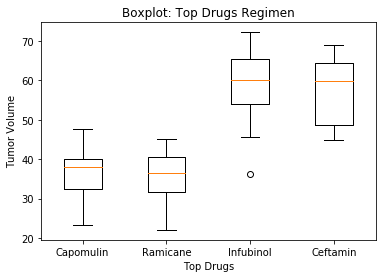

In [99]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#Create a list containing the quartile, IQR and outliers for each disease
Terminal_Diseases = [capo_diseases, ram_diseases, infu_diseases, cef_diseases]
#generate the blox chart and give it format
fig1, ax1 = plt.subplots()
ax1.set_title("Boxplot: Top Drugs Regimen")
ax1.set_xlabel("Top Drugs")
ax1.set_ylabel("Tumor Volume")
ax1.boxplot(Terminal_Diseases, labels=["Capomulin","Ramicane","Infubinol","Ceftamin",])
plt.show() #test succesfuly chart generated

## Line and scatter plots

In [100]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Timepoint_analysis = capomulin.loc[capomulin["Mouse ID"] == "l509",:]
Timepoint_analysis.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
371,l509,Capomulin,Male,17,21,0,45.000000,0
372,l509,Capomulin,Male,17,21,5,45.851193,0
373,l509,Capomulin,Male,17,21,10,46.759074,0
374,l509,Capomulin,Male,17,21,15,47.488599,1
375,l509,Capomulin,Male,17,21,20,48.070452,2


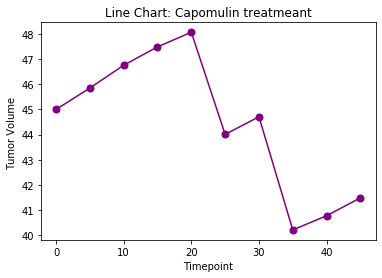

In [101]:
#stabkish the "x" and "y" axxis and generate the line chart, with labels and format
x_Timepoint = Timepoint_analysis["Timepoint"]
y_tumoranal = Timepoint_analysis["Tumor Volume (mm3)"]
plt.title("Line Chart: Capomulin treatmeant")
plt.plot(x_Timepoint, y_tumoranal, markersize=7, marker ='o', color='purple')
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume ")
plt.show() # test succesfully line chart generated

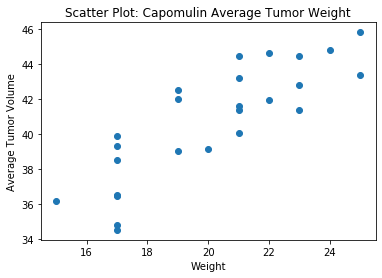

In [102]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
Capomulin_id =capomulin.loc[capomulin["Drug Regimen"] == "Capomulin",:] 
#Capomulin_id
Capomulinavg =Capomulin_id.groupby(["Mouse ID"]).mean()
#Capomulinavg
plt.scatter(Capomulinavg["Weight (g)"],Capomulinavg["Tumor Volume (mm3)"])
plt.title("Scatter Plot: Capomulin Average Tumor Weight")
plt.xlabel("Weight")
plt.ylabel("Average Tumor Volume")
plt.show()#test sucesfully scatter plot generated

In [103]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
corr=round(st.pearsonr(Capomulinavg["Weight (g)"],Capomulinavg["Tumor Volume (mm3)"])[0],2)
print(f"The correlation is {corr}")
Lin_Reg=st.linregress(Capomulinavg['Weight (g)'],Capomulinavg['Tumor Volume (mm3)'])
print(f"The {Lin_Reg}")

The correlation is 0.84
The LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.1275435903320134)


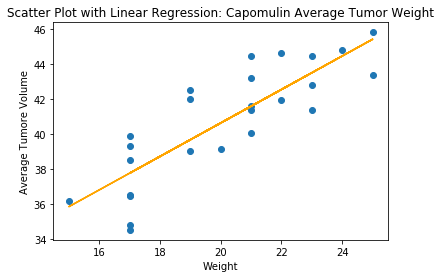

In [104]:
#Add the slop and intercept value from the line regresion in order to generate the scatterplot with the line regression
slope=0.9544396890241045
intercept=21.552160532685015
y_avgtumvol = Capomulinavg['Weight (g)']*slope+intercept
plt.scatter(Capomulinavg['Weight (g)'],Capomulinavg['Tumor Volume (mm3)'])
plt.plot(Capomulinavg["Weight (g)"],y_avgtumvol,color="orange")
plt.title("Scatter Plot with Linear Regression: Capomulin Average Tumor Weight")
plt.xlabel("Weight")
plt.ylabel("Average Tumore Volume")
plt.show() #test succesfully line regression generated

Data Insight Analysis

Pymarceutical in his compromise in offering the most inovative and effectlive treatments in the market, has developed the Capomulin treamtent against brain tumor. The treatment was then tested with other treatments in a sample of 349 mouse subjects with brain damaged,50.20% were male and 49.20 were female.(review pie chart above). The purpose of the test was to see the performance that has the Capomulin in eliminationg the brain tumor. After deep analysis here are the following trends found in the test data results:

1°)The Capomulin treatment has the topest data points from all the medications with 230 points, it was followed very shortly by Ramicane with 228 points. Despite being promising treatments, Infubinol and Ceftamin are ranked a the bottom of the list in the points rank with 178, just barerly above Proprivia.(review bar_charts results above)

2°) The Capomulin is the most efficent treatment against tumors (having an IQR 7.78). It is follow by the Ramicane treatment with a slightly less efficent than the Capumulin (IQR 9.10 On the contary the infubinol and Cetfamin are less efficent in treating the tumors (11.48 and 15.58 IQR each). (review boxplot_chart results aboe)

3°) the Capomulin treatment has a slightly positive correation between the Average Tumor Volume and the weight of each mice, which means that the chance of eliminating the tumor are much bigger

In conclusion, we can say that the Capomulin treatment has a much better performance clearing the tumor on the subject mice in a faster pace than the rest of the treatments, I suggest to move up with the data and start testing with human subjectsand see how well perform.